# Posterior Approximation for a Binomial model

Let the probability density function for binomial distribution: $P(y | n, p) = {n \choose y} p^{y}(1-p)^{(n-y)} $

Where $n$ is the **number of trials**, p **probability of success** and $y$ the **number of successes in $n$ trials**.

We can express this probability density function as an exponential model :

$$P(y | n, \theta) = exp[y \theta - n log(1 + e^{\theta}) + log{n \choose y}] $$

And then express the posterior distribution of $\theta$ for a Binomial model:

$$P(\theta | y, n) \propto P(y | n, \theta) p(\theta) = exp[y \theta - n log(1 + e^{\theta}) + log{n \choose y}] P(\theta)$$


Where $\theta = log(\frac{p}{1 - p})$ and conversely $p = \frac{e^{\theta}}{1 + e^{\theta}}$ 




In [33]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import json
from math import exp

In [34]:
def extract_from_file(path):
    with open(path, 'r') as input_file:
        data = json.load(input_file)
    theta = [d[0] for d in data]
    data_frame = pd.DataFrame({'theta': theta})
    return data_frame

def sample(df, by):
    data_frame = pd.DataFrame({'theta': [theta[1] for theta in data2['theta'].items() if theta[0] % 10 == 0]})
    return data_frame

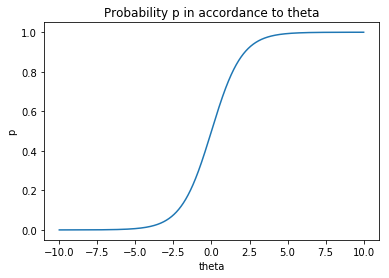

In [37]:
x = np.arange(-10,10, 0.001)
y = [exp(t)/(1 + exp(t)) for  t in x]
fig, ax = plt.subplots()
ax.set(xlabel='theta', ylabel='p',
       title='Probability p in accordance to theta')
ax.plot(x,y)


### First result
* sample size : $size=1$
* $theta_0 = [10]$
* $y \sim Bin(n = 100, p = \frac{e^{0.2}}{1 + e^{0.2}})$
* $\Delta=[0.005]$
* Number of samples: $n=10000$
* Shadow chain length: $n_{shadow} = 200$

In [38]:
FILE_NAME_1 = 'assets/exp1.json'

/Users/quentin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


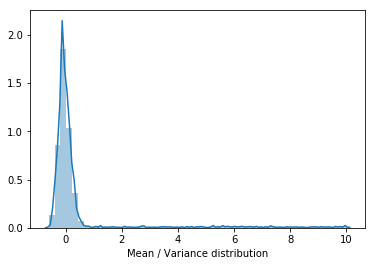

In [39]:
data1 = extract_from_file(FILE_NAME_1)
sns.distplot(data1['theta'], axlabel="Mean / Variance distribution")

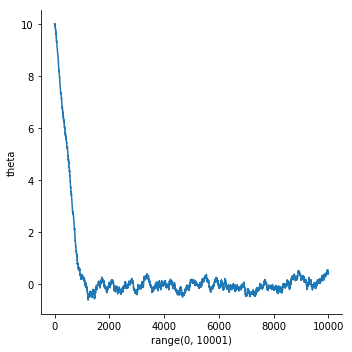

In [40]:
sns.relplot(x=range(len(data1['theta'])),y='theta', data=data1, kind='line', legend='brief')

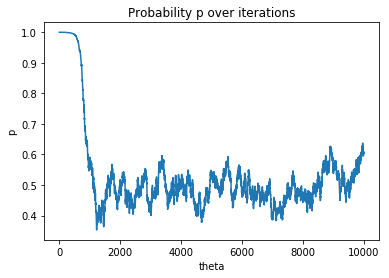

In [42]:
iters = range(len(data1['theta']))
p = [exp(t)/(1 + exp(t)) for  t in data1['theta']]

fig, ax = plt.subplots()
ax.set(xlabel='theta', ylabel='p',
       title='Probability p over iterations')
ax.plot(x,y)

### Second result
* sample size : $size=1$
* $theta_0 = [10]$
* $y \sim Bin(n = 100, p = \frac{e^{-10}}{1 + e^{-10}})$
* $\Delta=[0.05]$
* Number of samples: $n=10000$
* Shadow chain length: $n_{shadow} = 100$

In [43]:
FILE_NAME_2 = 'assets/exp2.json'

/Users/quentin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


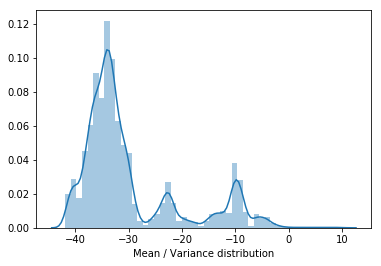

In [45]:
data2 = extract_from_file(FILE_NAME_2)
sns.distplot(data2['theta'], axlabel="Mean / Variance distribution")

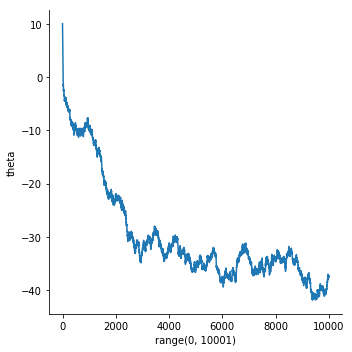

In [46]:
sns.relplot(x=range(len(data2['theta'])),y='theta', data=data2, kind='line', legend='brief')

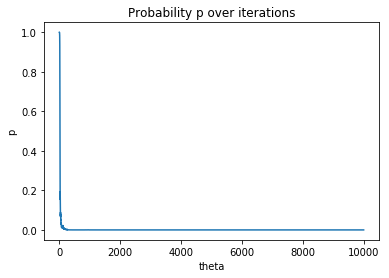

In [48]:
iters = range(len(data2['theta']))
p = [exp(t)/(1 + exp(t)) for  t in data2['theta']]
fig, ax = plt.subplots()
ax.set(xlabel='theta', ylabel='p',
       title='Probability p over iterations')
ax.plot(x,y)